In [42]:
from ast import literal_eval
import numpy as np
import seaborn as sns

In [43]:
with open("coad_differential_mutations_miRNA.txt",'r') as file:
    line = file.readline()
    arr = literal_eval(line)
    data_matrix = np.array(arr)

In [44]:
data_matrix

array([[ 3.125     ,  4.125     ,  2.125     , ...,  0.33656618,
        -0.4686835 ,  0.06128893],
       [ 0.75      ,  0.75      , -0.25      , ..., -0.77646597,
        -0.50936321, -0.59508195],
       [ 0.        ,  0.        ,  0.        , ...,  0.44545507,
         0.74130287, -0.6747451 ],
       ...,
       [ 0.875     ,  0.875     , -0.125     , ...,  0.73652793,
        -0.33440949, -0.17422147],
       [ 0.        ,  0.        ,  0.        , ..., -0.25985652,
        -0.65561795, -0.39079213],
       [-0.125     , -0.125     ,  0.875     , ...,  0.22182672,
        -0.42894339, -0.6747451 ]])

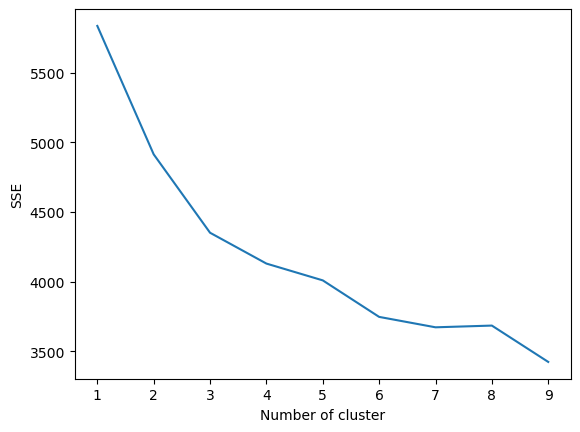

In [45]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = data_matrix

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,n_init='auto').fit(X)
    X_labels = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Around 15 clusters, it becomes less steep. That should be the knee point.

Edit: For COAD, 3 or 4 clusters looks like the knee point

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X = data_matrix
silscores = []

for n_cluster in range(2, 30):
    kmeans = KMeans(n_clusters=n_cluster,n_init='auto').fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    silscores.append(sil_coeff)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

max(silscores)

For n_clusters=2, The Silhouette Coefficient is 0.4100767406970607
For n_clusters=3, The Silhouette Coefficient is 0.4979030331290998
For n_clusters=4, The Silhouette Coefficient is 0.16975474892476297
For n_clusters=5, The Silhouette Coefficient is 0.15716638311858308
For n_clusters=6, The Silhouette Coefficient is 0.05608418253618562
For n_clusters=7, The Silhouette Coefficient is 0.14821679852195505
For n_clusters=8, The Silhouette Coefficient is 0.07415406400723104
For n_clusters=9, The Silhouette Coefficient is 0.06450384481350353
For n_clusters=10, The Silhouette Coefficient is 0.1304893103038119
For n_clusters=11, The Silhouette Coefficient is 0.09142983884798879
For n_clusters=12, The Silhouette Coefficient is 0.03883244198052461
For n_clusters=13, The Silhouette Coefficient is 0.06451921774078578
For n_clusters=14, The Silhouette Coefficient is 0.0789004411456691
For n_clusters=15, The Silhouette Coefficient is 0.04036599733475366
For n_clusters=16, The Silhouette Coefficient 

0.4979030331290998

If n_clusters >= 3, optimal at 3 clusters.
If n_clusters >= 5, optimal at 9 clusters.

In [71]:
k = 3
kmeans = KMeans(n_clusters=k,n_init='auto').fit(data_matrix)
label = kmeans.labels_
sil_coeff = silhouette_score(X, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
label

For n_clusters=3, The Silhouette Coefficient is 0.5083458542392184


array([2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,

In [72]:
arr = list(enumerate(label.tolist()))
tuples = sorted(arr, key=lambda x: x[1])
tuples

[(1, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 0),
 (26, 0),
 (27, 0),
 (28, 0),
 (29, 0),
 (30, 0),
 (31, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 0),
 (37, 0),
 (38, 0),
 (39, 0),
 (40, 0),
 (41, 0),
 (42, 0),
 (43, 0),
 (44, 0),
 (45, 0),
 (46, 0),
 (47, 0),
 (48, 0),
 (49, 0),
 (50, 0),
 (51, 0),
 (52, 0),
 (53, 0),
 (55, 0),
 (56, 0),
 (57, 0),
 (59, 0),
 (60, 0),
 (61, 0),
 (62, 0),
 (63, 0),
 (64, 0),
 (65, 0),
 (66, 0),
 (67, 0),
 (69, 0),
 (71, 0),
 (72, 0),
 (73, 0),
 (74, 0),
 (75, 0),
 (76, 0),
 (77, 0),
 (78, 0),
 (79, 0),
 (80, 0),
 (81, 0),
 (82, 0),
 (83, 0),
 (84, 0),
 (85, 0),
 (86, 0),
 (87, 0),
 (88, 0),
 (89, 0),
 (90, 0),
 (91, 0),
 (92, 0),
 (93, 0),
 (94, 0),
 (96, 0),
 (97, 0),
 (98, 0),
 (99, 0),
 (100, 0),
 (101, 0),
 (102, 0),
 (104, 0),
 (105, 0),
 (106, 0),
 (107, 0),
 (108, 0),
 (109, 0)

In [73]:
reordered_indices = [x[0] for x in tuples]
reordered_indices

[1,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 120,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 145,
 146,
 147,
 148,
 151,
 152,
 153,
 154,
 155,
 156,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,


In [74]:
# reordered_cols = [0,2,1]+list(range(3,19))+[20,22,19,21,23]

In [75]:
reordered_matrix = data_matrix[reordered_indices]
# reordered_matrix_2 = reordered_matrix[:,reordered_cols]

<Axes: >

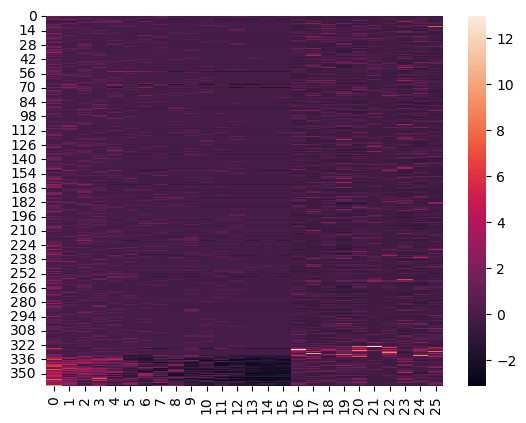

In [76]:
sns.heatmap(reordered_matrix)

In [77]:
with open("coad_cluster_labels.txt",'w') as file:
    file.write(str(label.tolist()))